In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time


%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
#matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Initial Data observations

- The dataset contains **12 features(columns)** with **32,581 data points(rows)**;
- There are **no null**;
- There were **165** rows that were **duplicated**;
- There are about **3,915** values that have missing values. This accounts for about **12%** of the data. 

#### Feature Columns

- **Person Age**: This is the age of the credit candidate;
- **Person Income**: Person annual income
- **Person Home ownership**: Type of home owership(Renting, mortgage, own, etc);
- **Person Emp Length**: How long as the candidate been employed for in years;
- **Loan Intent**: The intention for the loan;
- **Loan grade** : Level of risk assigned to each loan(A is the lowest risk loan);
- **Loan Amount**: This is the loan amount asked for;
- **Loan Int Rate**: Interest rate on the loan;
- **Loan status**: is loan in default(1) or non-default(0);
- **Loan Percentage income**: Percentage income dedicated to mortgate;
- **cb_person_default_on_file**: If the person has a default history;
- **cb_person_cred_hist_length**: Candidate credit history.



In [2]:
credit_df = pd.read_csv('./dataset/credit_risk_dataset.csv')
credit_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [22]:
credit_df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [3]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [8]:
credit_df[credit_df.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [17]:
credit_df.drop_duplicates(inplace=True)

In [18]:
rows_with_nan = credit_df[credit_df.isna().any(axis=1)]

rows_with_nan

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


In [19]:
new_df = credit_df.dropna()
new_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


### Exploratory Data Analysis

#### Statistical Analysis
- Person has a **max age of 144** which is likely an error;
- there is an employement length of **123 years** which is likely an error;
- Some of the columns such has credit history and loan amount might have outliers. These will be dealt with later if this is the case.



In [20]:
new_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28501.000000,2.850100e+04,28501.000000,28501.000000,28501.000000,28501.000000,28501.000000,28501.000000
mean,27.738676,6.665441e+04,4.790148,9658.533034,11.045385,0.217115,0.169517,5.800498
std,6.316166,6.237603e+04,4.157462,6329.604672,3.230748,0.412289,0.106410,4.042153
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.950000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [26]:
new_df.nunique()

person_age                      57
person_income                 3835
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      728
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [29]:
numeric_cols = new_df.columns[new_df.nunique() > 7].tolist()
numeric_cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [30]:
target_column = 'loan_status'
new_df = new_df[[col for col in new_df.columns if col != target_column] + [target_column]]
new_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28,1
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26,0


#### Exploring Categorical Features
- These features include: `person_home_ownership`, `loan_intent`, `loan_grade`, `loan_status`, `cb_person_default_on_file`;


#### Observations

#### 1) Loan Status(Target)
- The target has two classes. These are `default-(1)` and `non-default-(0)`;
- After removing duplicates and rows with `NaN`, there are **22,313 default** cases and **6,188 non-default** cases. In percentage terms, that is **78.29%** non-default cases and **21.71%** default;


#### 2) Loan Intent
- Most loans seem to be taken out for **Education**, followed by **medical** and **ventures**. The category with the lowest loan application is **home improvements**;

- People seem to default more on medical loans;

- The distribution of data among the categories seems to be faily balanced, with home improvements being relatively lower;

#### 3) Loan Grade
- The most loans are of **grade A**, followed by **B** and descend that way until G which is practically none. This means loans with the least risk attached are the ones issued the most.

- The grades are highly concentrated between **grade A** as well as **grade B** each having around **30%** of the data. C and D have around **20%** and **11%** respectively. The rest are much lower.

#### 4) Home Ownership
- Most people that apply for loans **Rent** their homes, followed by those who have **Mortgage**, the those who **Own**, who are low compared to the other two categories;

- The data is significantly concentrated around **Rent(50.9%)** and **Mortgage(41.2)**, with about only **7.6%** being **Own**;

#### 5) Default History
- From the applicants, **17.9%** of the applicants have a history of defaulting on payments.

In [31]:
cat_cols = new_df.columns[new_df.nunique() <= 7].tolist()
cat_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file',
 'loan_status']

In [46]:
value_counts_dict = {}

# Iterate through each categorical column
for col in cat_cols:
    value_counts_dict[col] = new_df[col].value_counts()

# Display the value counts for each column
for col, value_counts in value_counts_dict.items():
    print(f"Value counts for column '{col}':")
    print(value_counts)
    print("\n")

Value counts for column 'person_home_ownership':
person_home_ownership
RENT        14498
MORTGAGE    11736
OWN          2174
OTHER          93
Name: count, dtype: int64


Value counts for column 'loan_intent':
loan_intent
EDUCATION            5670
MEDICAL              5269
VENTURE              4969
PERSONAL             4859
DEBTCONSOLIDATION    4547
HOMEIMPROVEMENT      3187
Name: count, dtype: int64


Value counts for column 'loan_grade':
loan_grade
A    9345
B    9094
C    5682
D    3243
E     869
F     209
G      59
Name: count, dtype: int64


Value counts for column 'cb_person_default_on_file':
cb_person_default_on_file
N    23411
Y     5090
Name: count, dtype: int64


Value counts for column 'loan_status':
loan_status
0    22313
1     6188
Name: count, dtype: int64




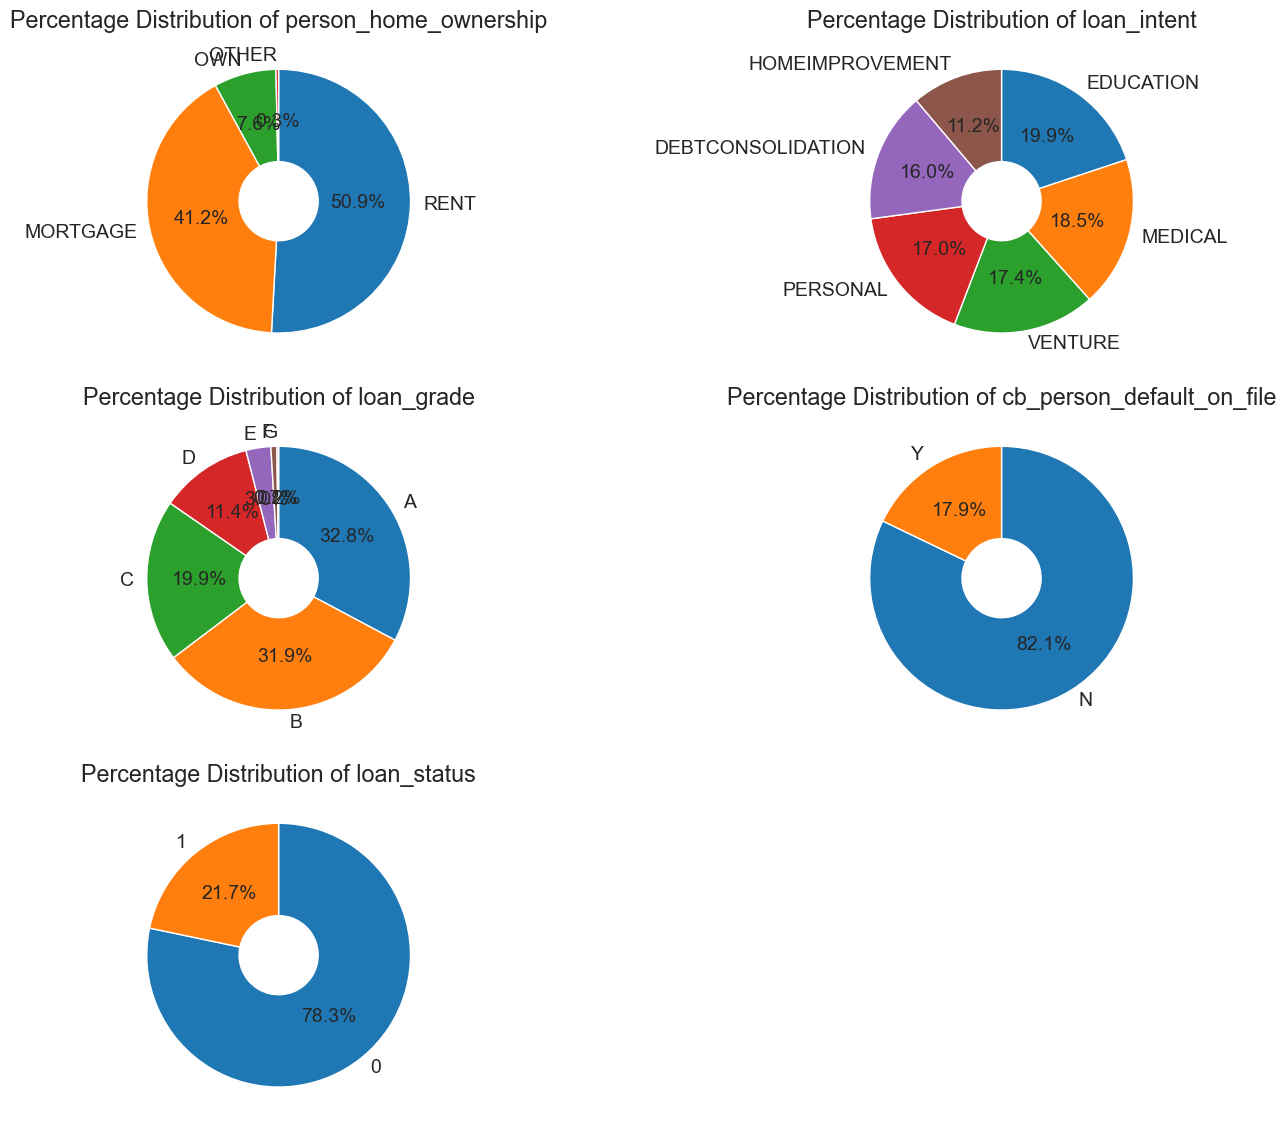

In [77]:
num_columns = 2

# Calculate the number of rows needed for the grid
num_rows = len(cat_cols) // num_columns + (len(cat_cols) % num_columns > 0)  # Ceiling division

# Create a grid of pie charts
plt.figure(figsize=(15, 4 * num_rows))
for i, col in enumerate(cat_cols):
    plt.subplot(num_rows, num_columns, i + 1)
    
    # Calculate value counts and percentages
    value_counts = new_df[col].value_counts()
    percentages = value_counts / value_counts.sum() * 100
    
    # Create a pie chart with adjusted layout
    plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=90, counterclock=False,
            wedgeprops=dict(width=0.7, edgecolor='w'))  # Adjust wedgeprops for separation
    
    plt.title(f'Percentage Distribution of {col}')

# Adjust layout with bbox_to_anchor
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the values as needed

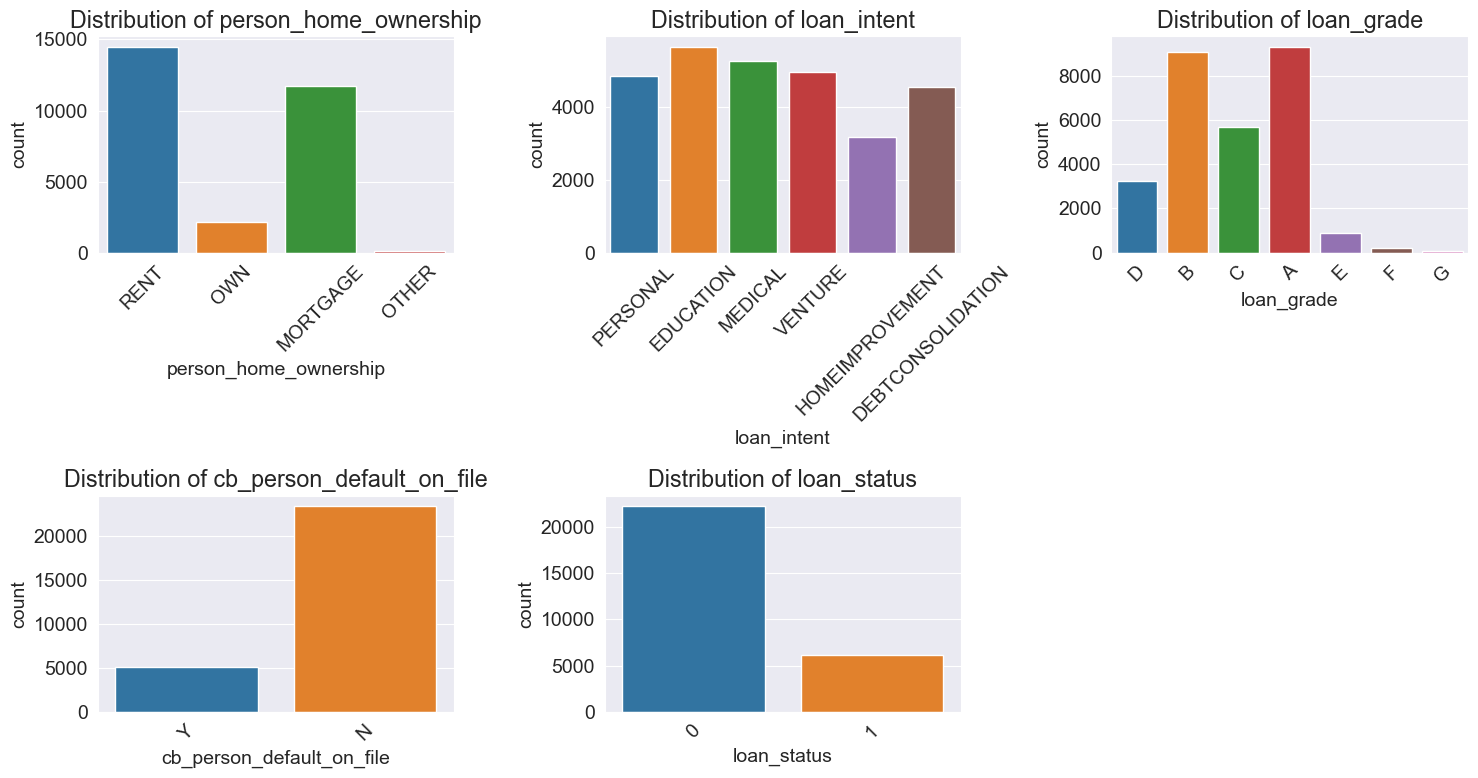

In [37]:
df_cat = new_df[cat_cols]

# Calculate the number of rows needed for the grid
num_rows = len(cat_cols) // 3 + (len(cat_cols) % 3 > 0)  # Ceiling division

# Set up subplots with 3 columns
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 4 * num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create count plots for each categorical column
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df_cat, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

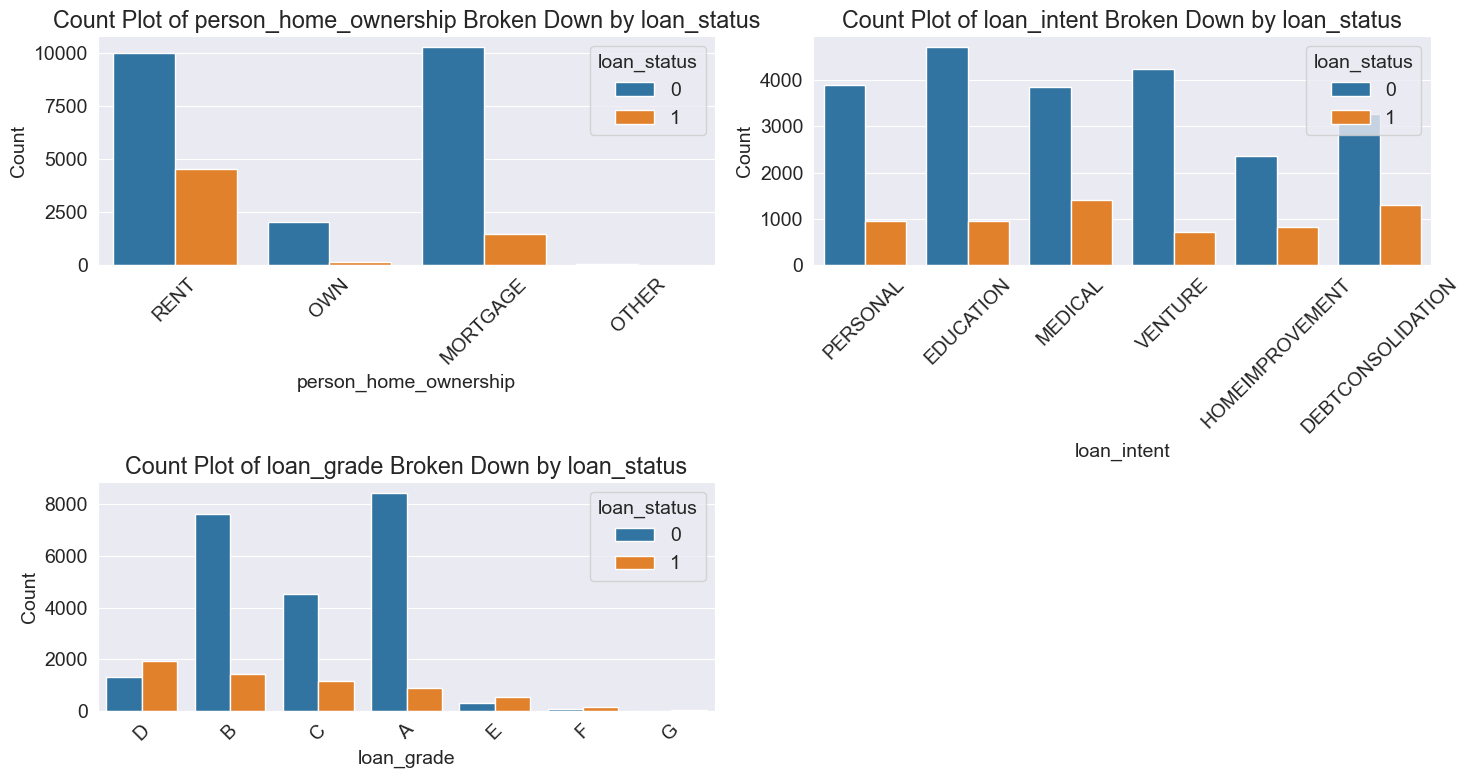

In [93]:
category_col1_list = ['person_home_ownership', 'loan_intent', 'loan_grade']  # Replace with your actual category names
category_col2 = 'loan_status'

# Calculate the number of rows needed for the grid
num_rows = len(category_col1_list) // 2 + (len(category_col1_list) % 2 > 0)  # Ceiling division

# Set up subplots with 2 columns
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 4 * num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create count plots for each category in 'category_col1' broken down by 'category_col2'
for i, category_col1 in enumerate(category_col1_list):
    sns.countplot(x=category_col1, hue=category_col2, data=new_df, ax=axes[i])
    axes[i].set_title(f'Count Plot of {category_col1} Broken Down by {category_col2}')
    axes[i].set_xlabel(category_col1)
    axes[i].set_ylabel('Count')
    axes[i].legend(title=category_col2)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

### Exploring numerical Features

- The numeral columns all seem to be skewed right;
- The **person_age** and **person_emp_length** have values that are unrealistic, which explains the long tails;


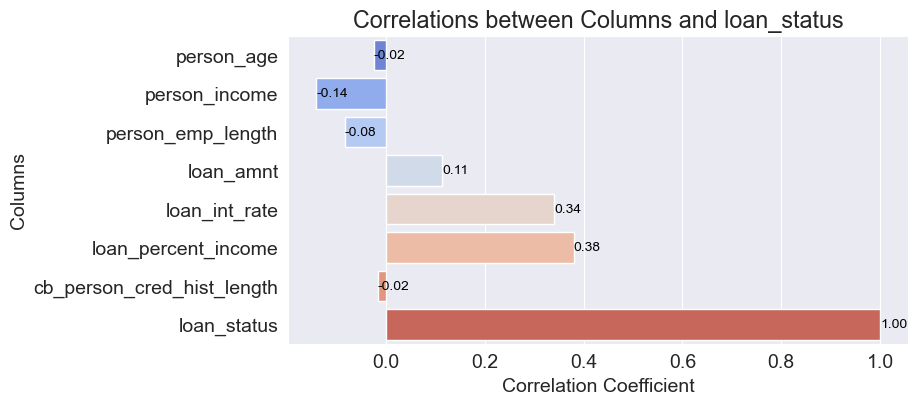

In [54]:
target_column = 'loan_status'  # Replace with your actual target column name

# Calculate correlations between numeric columns and the target variable
numeric_columns = new_df.select_dtypes(include=['int64', 'float64']).columns
correlations = new_df[numeric_columns].corrwith(new_df[target_column])

# Create a horizontal bar chart with labels
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=correlations, y=correlations.index, palette='coolwarm')

# Add values as labels on the bars
for i, value in enumerate(correlations):
    ax.text(value, i, f'{value:.2f}', va='center', fontsize=10, color='black')

plt.title(f'Correlations between Columns and {target_column}')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Columns')
plt.show()

In [60]:
new_df[numeric_cols]

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,0.59,3
1,21,9600,5.0,1000,11.14,0.10,2
2,25,9600,1.0,5500,12.87,0.57,3
3,23,65500,4.0,35000,15.23,0.53,2
4,24,54400,8.0,35000,14.27,0.55,4
...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0.11,30
32577,54,120000,4.0,17625,7.49,0.15,19
32578,65,76000,3.0,35000,10.99,0.46,28
32579,56,150000,5.0,15000,11.48,0.10,26


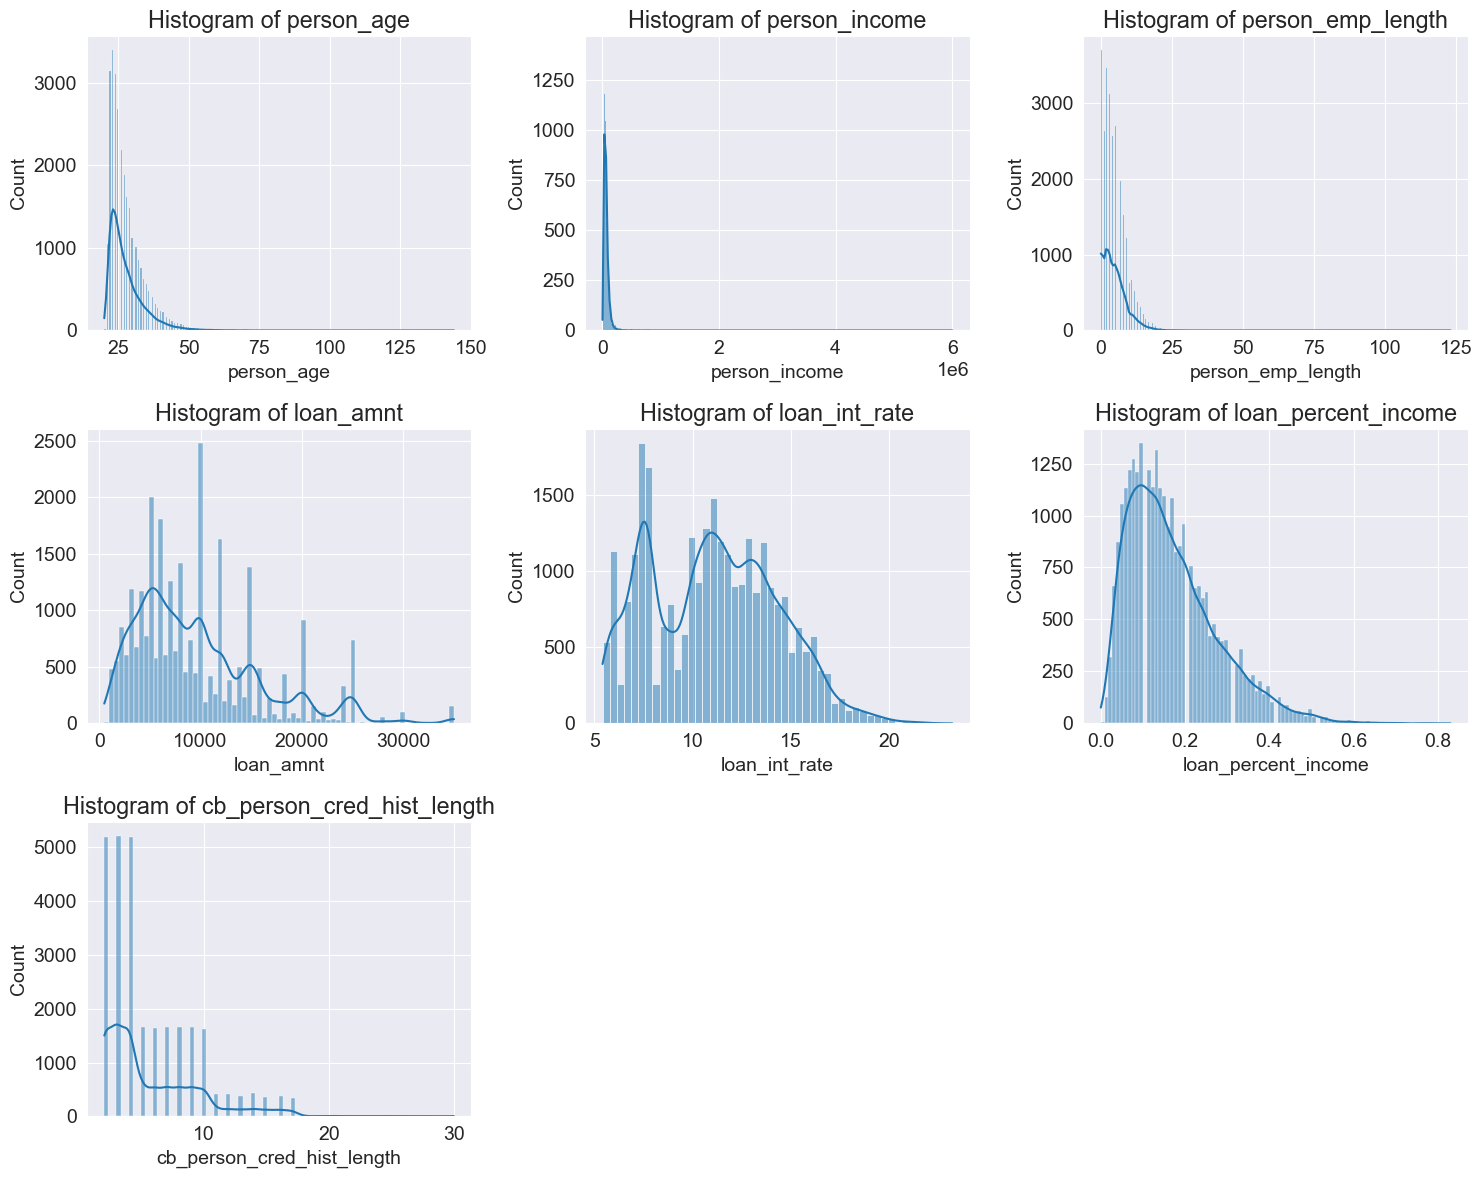

In [63]:
num_rows = len(numeric_cols) // 3 + (len(numeric_cols) % 3 > 0)  # Ceiling division

# Set up subplots with 3 columns
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 4 * num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through numerical columns and create histograms
for i, col in enumerate(numeric_cols):
    sns.histplot(new_df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

<Axes: xlabel='person_income', ylabel='Count'>

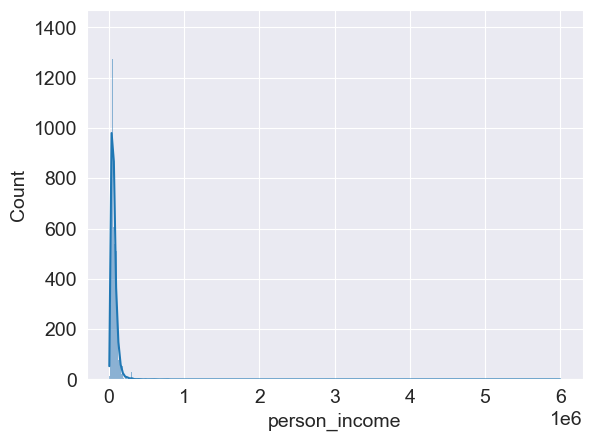

In [95]:
sns.histplot(new_df['person_income'], kde=True)

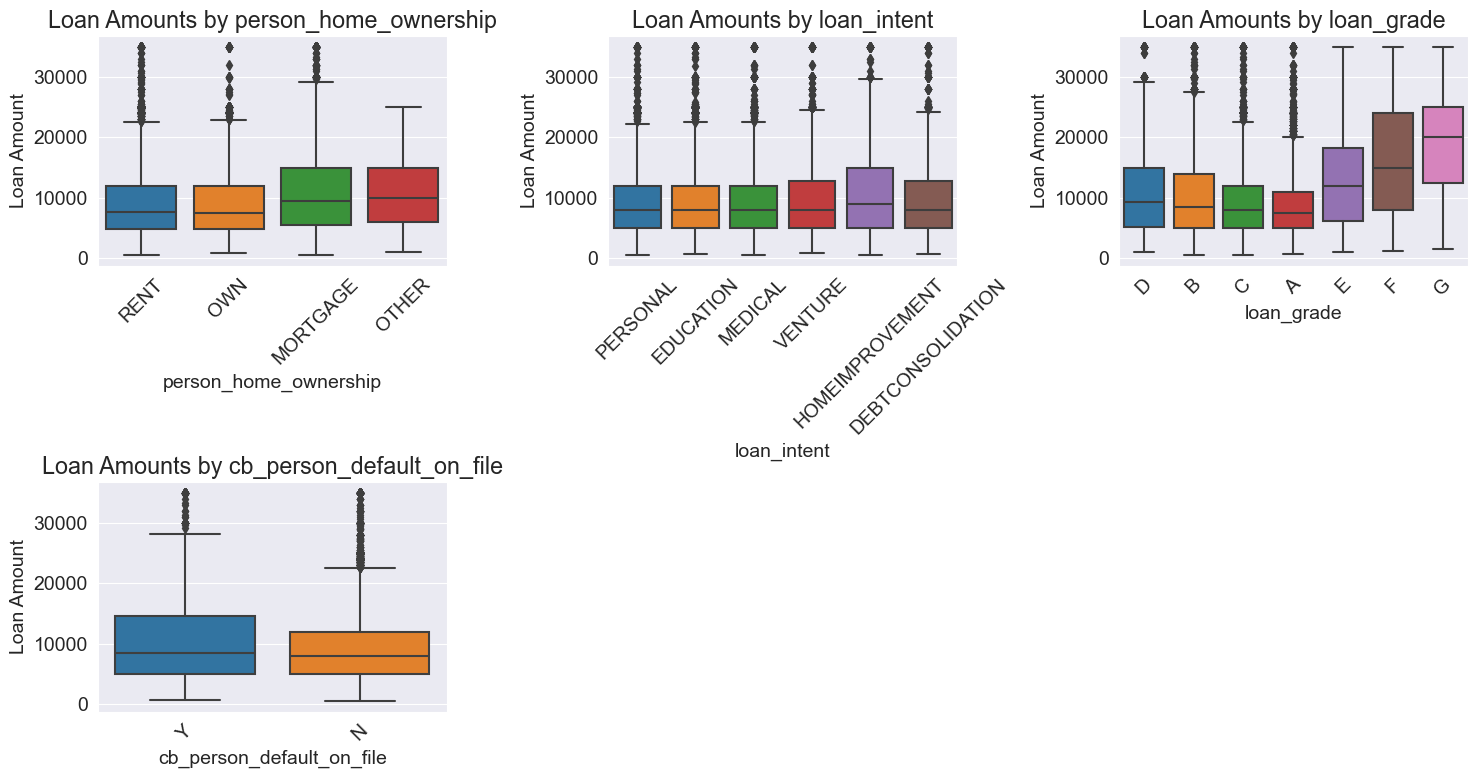

In [68]:
loan_amount_col = 'loan_amnt'
category_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']  # Replace with your actual column names

# Set the number of columns in the grid
num_columns = 3

# Calculate the number of rows needed for the grid
num_rows = len(category_columns) // num_columns + (len(category_columns) % num_columns > 0)  # Ceiling division

# Create a grid of box plots
plt.figure(figsize=(15, 4 * num_rows))
for i, category_col in enumerate(category_columns):
    plt.subplot(num_rows, num_columns, i + 1)
    sns.boxplot(x=category_col, y=loan_amount_col, data=new_df)
    plt.title(f'Loan Amounts by {category_col}')
    plt.xlabel(category_col)
    plt.ylabel('Loan Amount')
    
    # Rotate x-axis labels
    plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

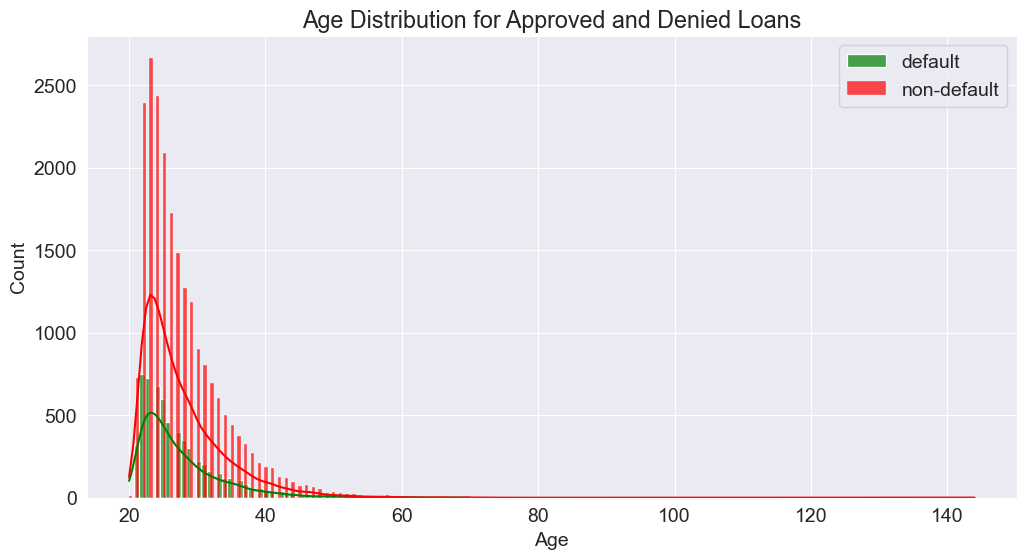

In [79]:
loan_status_col = 'loan_status'
person_age_col = 'person_age'

# Create separate DataFrames for approved and denied loans
default_loans = new_df[new_df[loan_status_col] == 1]
non_default_loans = new_df[new_df[loan_status_col] == 0]

# Plot the age distribution for approved and denied loans
plt.figure(figsize=(12, 6))
sns.histplot(approved_loans[person_age_col], kde=True, label='default', color='green', alpha=0.7)
sns.histplot(denied_loans[person_age_col], kde=True, label='non-default', color='red', alpha=0.7)

plt.title('Age Distribution for Approved and Denied Loans')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

### Filtering some extreme outliers

- There are values for age and years of employment that are unrealistic. These values will be filtered out.
- Any other values that are outliers will be considered acceptable part of the data.

In [82]:
person_age_col = 'person_age'
person_emp_length_col = 'person_emp_length'

# Create a new DataFrame with filtered values
filtered_df = new_df.loc[(new_df[person_age_col] <= 80) & (new_df[person_emp_length_col] <= 60)]
filtered_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,0.25,N,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28,1
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26,0


In [90]:
column_name_mapping = {
    'person_age': 'age',
    'person_income': 'income',
    'person_home_ownership': 'home_ownership_type',
    'person_emp_length': 'years_of_employment',
    'percent_income_for_mortgate':'percent_income_mortgaged',
    'cb_person_default_on_file':'default_history',
    'cb_person_cred_history_length':'credit_history_years'
    
}

# Rename the columns
filtered_df = filtered_df.rename(columns=column_name_mapping)
filtered_df

,age,income,home_ownership_type,years_of_employment,loan_intent,loan_grade,loan_amnt,loan_int_rate,percent_income_mortgaged,default_history,cb_person_cred_hist_length,loan_status
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,0.25,N,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28,1
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26,0


In [91]:
filtered_df.to_csv('to_preprocess.csv', index=False)